In [85]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import glob
import DominantColor

image_list=[]
image_list_col =[]



def printSigns(image_list, is_grey):
    f = plt.figure()
    f.set_figwidth(40)
    f.set_figheight(40)
    
    col_number = 3
    row_number = 7
    num = 1
    
    for img in image_list:
        plt.subplot(row_number,col_number,num)
        if is_grey:
            plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
        else:
            plt.imshow(img)
        num += 1
        
printSigns(image_list, False)



    

<Figure size 4000x4000 with 0 Axes>

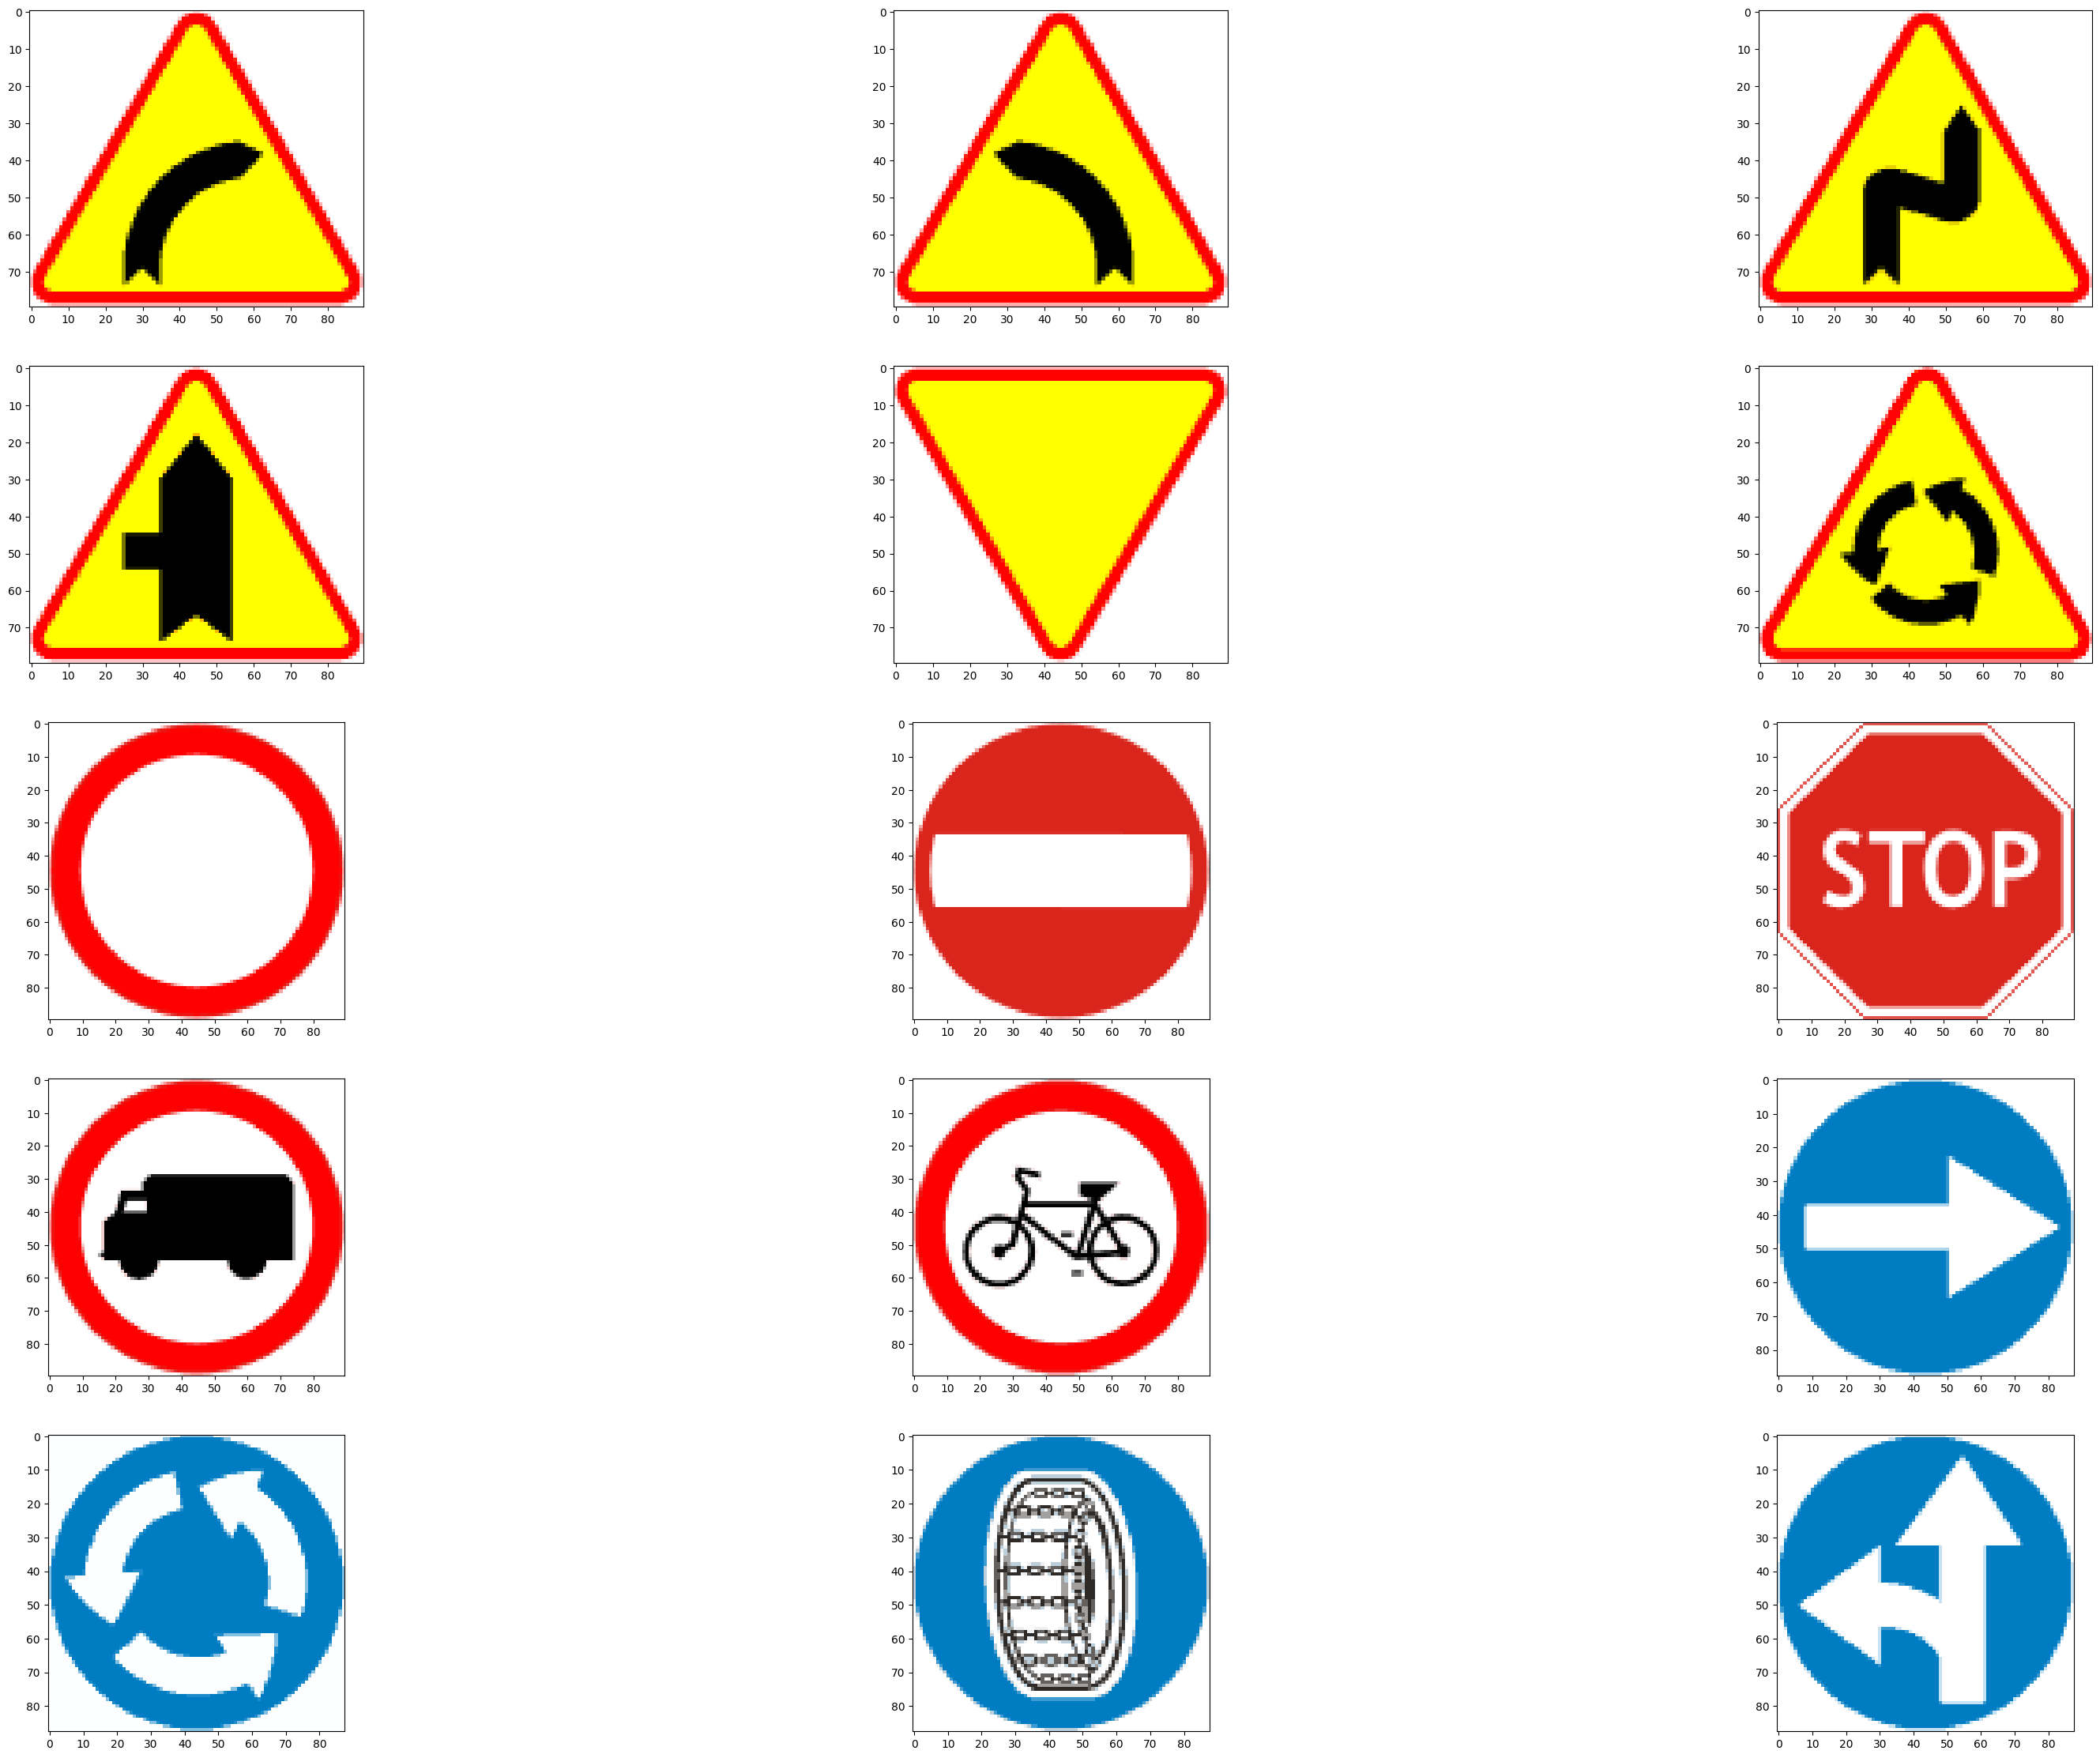

In [86]:


extensions = ("*.png","*.jpg","*.jpeg",)
glob_list = []
for extension in extensions:
    glob_list.extend(glob.glob("../../znaki-sandbox/znaki/"+extension))


for filename in glob_list:
    im = cv2.imread(filename)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    image_list.append(im)
    
printSigns(image_list, False)

In [87]:
import itertools
b = [0, 0, 0]
c = [0, 0, 10]


def dopasowanieKoloru(b, col):
    # print(col)
    dh = min(abs(col[0]-b[0]), 255-abs(col[0]-b[0]))**2 /255**2
    ds = abs(col[1]-b[1]) /255
    dv = abs(col[2]-b[2]) / 255.0     
    return 1+(dh*dh*dh)
def checkWhite(col):    
    return abs(255-col[2]) / 255.0   


    return 1-dh
class estymarotZnaku:
    def __init__(self):
        # self.i = 0 ;
        pass
        
    def est(self, arr):            

        return [self.checkA(arr),          
        self.checkB(arr) ,          
        self.checkC(arr)]
    
    def checkA(self,col):
        yelow = [ 23,   253,   252]
        red = [  250,   253,     253]
        yd = 0
        bd = 0
        rd = 0
        for i in col:
            yd= max(yd,dopasowanieKoloru(yelow, i))
            rd= max(rd,1-checkWhite( i))
            bd= max(bd,dopasowanieKoloru(red, i))
        return yd*.5+rd*.4 +bd*.1
    
    def checkB(self,col):
        red = [ 250,   253,   252]
        yd = 0
        bd = 0
        rd = 0
        for i in  col:
            yd= max(yd,dopasowanieKoloru(red, i))
            # rd= max(rd,checkWhite( i))
            bd= max(bd,1-checkWhite( i))
        return yd*.6 +bd*.1#+rd*.4
    
    def checkC(self,col):
        blue = [ 170,   253,   252]
        yd = 0
        rd = 0
        for i in  col:
            yd= max(yd,dopasowanieKoloru(blue, i))
            # rd= max(rd,checkWhite( i))
        return yd*.5#+rd*.4 

    # def get_A(self):
    #     B =[[0,   0,   0],
    #           [0,   0, 0],
    #           [0,   0, 0]]
    #     for k in range(3):
    #         for j in range(3):
    #             B[k][j] = self.A[k][j]/self.i
    #     return B
est = estymarotZnaku()


In [88]:
def compareFn(a, b)->int:
    if a[0]==b[0]:
        if a[1]==b[1]:
            if a[2]==b[2]:
                return 0
            else:
                return a[2]-b[2]
        else:
            return a[1]-b[1]
    else:
        return a[0]-b[0]
    
def sortCol(arr):
    if compareFn(arr[0], arr[1])>0:
        tmp = arr[0].copy()
        arr[0] = arr[1]
        arr[1] = tmp
    if compareFn(arr[1], arr[2])>0:
        tmp= arr[1].copy()
        arr[1]= arr[2]
        arr[2]= tmp
    if compareFn(arr[0], arr[1])>0:
        tmp = arr[0].copy()
        arr[0]= arr[1]
        arr[1]= tmp
        
# col = [[  0, 106 ,255],[  0 ,  0 ,254], [  0,   0 ,  0] ]
# col2 = [[255, 251, 251], [253 ,251,   0], [164,  10,   4]]
# sort(col)
# print(col)
# sort(col2)
# print(col2)

In [89]:


for img, filename in itertools.zip_longest(image_list ,glob_list) :
    dc = DominantColor.DominantColors(img)
    dmc = dc.dominantColors();# RGB
    dc.printCol(image_list_col)
    # print(dmc)    
    # dmc = cv2.cvtColor(dmc, cv2.COLOR_HSV2LAB)        
    sortCol(dmc)
    print(filename, end= "  ")    
    print(est.est(dmc))
    # if est.est(dmc)< .9:
    #     print(dmc )
    
    
# est.get_A()
    
    

../../znaki-sandbox/znaki\A-1.png  [1.000000447710331, 0.7000010709843211, 0.502899534874647]
../../znaki-sandbox/znaki\A-2.png  [1.0000004474023405, 0.7000010691363776, 0.5028982341738937]
../../znaki-sandbox/znaki\A-3.png  [1.0000004397499034, 0.7000010232217557, 0.5028654605388125]
../../znaki-sandbox/znaki\A-6c.png  [1.0000004108925173, 0.7000008500774402, 0.5027329315379551]
../../znaki-sandbox/znaki\A-7.png  [1.0000009184314367, 0.7000038953109543, 0.5041690216590161]
../../znaki-sandbox/znaki\A-8.png  [1.0000004242526552, 0.7000009302382663, 0.5027961884092951]
../../znaki-sandbox/znaki\B-1.png  [0.9998896071102827, 0.6999723347038719, 0.5007300470133813]
../../znaki-sandbox/znaki\B-2.png  [0.9998679096437839, 0.6999669104920779, 0.500746396607714]
../../znaki-sandbox/znaki\B-20.png  [0.9991287255152814, 0.699782118641832, 0.5007357319720366]
../../znaki-sandbox/znaki\B-5.png  [0.997384208088661, 0.6993459847537253, 0.5006884231317328]
../../znaki-sandbox/znaki\B-9.png  [0.99585

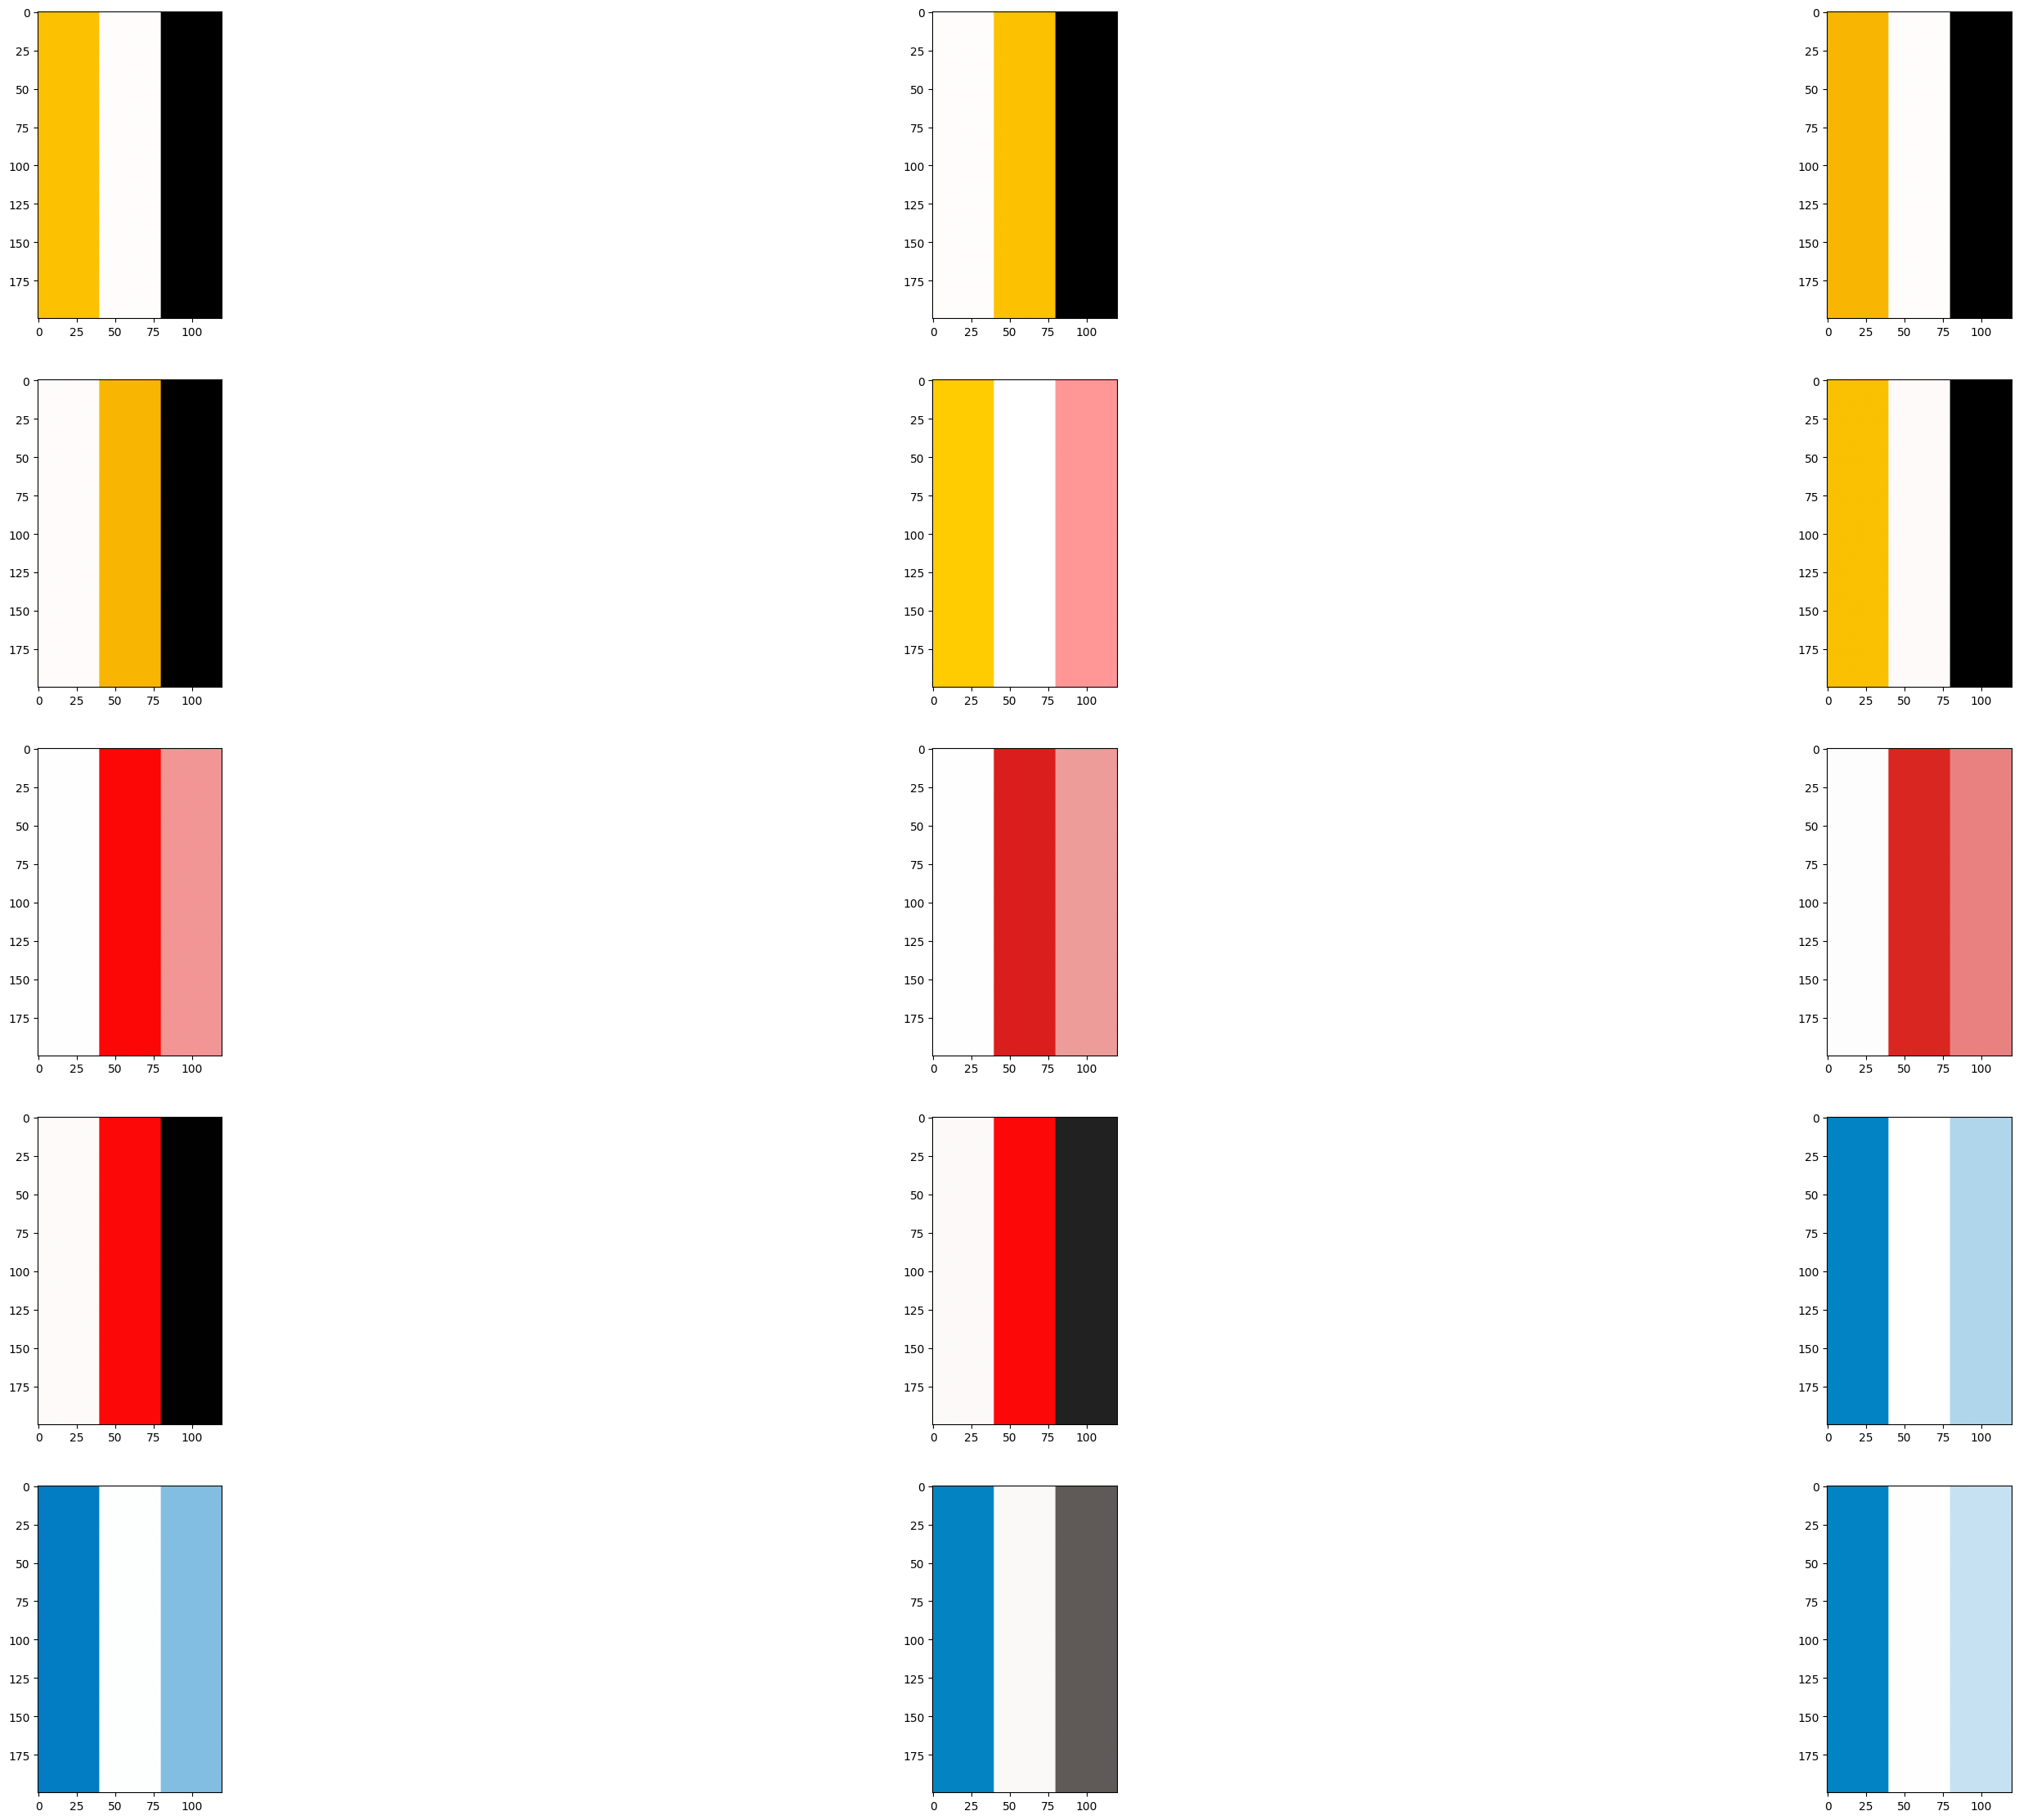

In [90]:
printSigns(image_list_col, False)